<div Style="text-align: center;line-height: 30px;font-size:32px;font-weight: bold"> Data Augmentation</div>
***

In [1]:
%matplotlib inline
from __future__ import print_function
from ipywidgets import interact_manual, fixed

import os.path

from math import ceil

import numpy as np
import random

from skimage import io
from skimage.transform import rotate, rescale, resize

import matplotlib.pyplot as plt

import json

# 1. Cambios de tamaño en la imagen

Debemos de tener en cuenta que en todos los cambios que realicemos sobre una imagen, tendremos que, a su vez, cambiar las etiquetas realizadas sobre la imagen con los cambios correspondientes. Para que las coordenadas de las etiquetas realizadas en un primera ocasión coincidan con las etiquetas en la imagen modificada.

En este caso, debemos de rescalar las coordenadas proporcionalmente al factor de rescalado.

In [2]:
import warnings
warnings.filterwarnings('ignore')

original_img = io.imread("../../../doc/general_doc/img/2.jpg")

# Factores de rescalado
factors = [0.6, 0.8, 1.2]

# Coordenadas ejemplo
coords = [[5,5,30,30],[50,90,90,10],[10,10,30,50],[250,300,10,40]]

## 1.1. Rescalado en los dos ejes

In [3]:
r_imgs = []
r_imgs.append(rescale(original_img, factors[0]))
r_imgs.append(rescale(original_img, factors[1]))
r_imgs.append(rescale(original_img, factors[2]))

In [4]:
def rescale_coords(coords, factor):
    rescale_coords = []
    for coord in coords:
        rescale_coords.append([c * factor for c in coord])
    return rescale_coords

In [5]:
rescale_c = []
rescale_c.append(rescale_coords(coords, factors[0]))
rescale_c.append(rescale_coords(coords, factors[1]))
rescale_c.append(rescale_coords(coords, factors[2]))

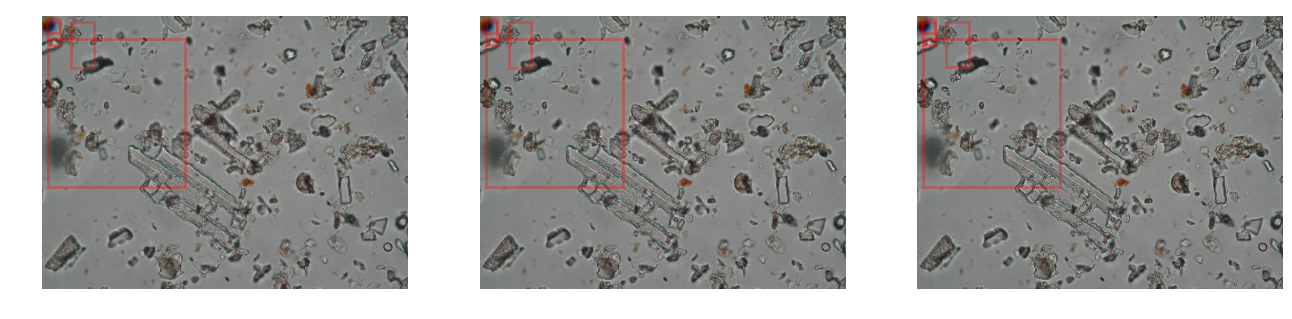

In [6]:
# Mostramos las imagenes resultantes
# Las imágenes se muestran con el mismo 
# tamaño, aunque sean de distinto tamaño

fig, axes = plt.subplots(ncols=3, figsize=(16, 16), subplot_kw={'adjustable':'box-forced'})

i=0
for ax in axes:

    ax.imshow(r_imgs[i])
    ax.axis('off')
    for coord in rescale_c[i]:
        # x, y, width, height
        ax.add_patch(plt.Rectangle((coord[0], coord[1]), coord[2] - coord[0], coord[3] - coord[1], edgecolor='red',
                                   alpha=0.3, lw=2, facecolor='none'))
    i += 1

## 1.2. Rescalado en el eje horizontal

In [7]:
def rescale_one_image_axis(image, factor, axis=0):
    h, w = image.shape[:2]
    
    if axis == 0:
        w = round(w * factor)
    elif axis == 1:
        h = round(h * factor)
    else:
        raise "Axis should be equalts to 0 o 1"
    
    return resize(image,(h,w))

In [8]:
r_h_imgs = []
r_h_imgs.append(rescale_one_image_axis(original_img, factors[0]))
r_h_imgs.append(rescale_one_image_axis(original_img, factors[1]))
r_h_imgs.append(rescale_one_image_axis(original_img, factors[2]))

In [9]:
def rescale_h_coords(coords, factor):
    rescale_coords = []
    for coord in coords:
        r_coord = list(coord)
        r_coord[0] = r_coord[0] * factor
        r_coord[2] = r_coord[2] * factor
        rescale_coords.append(r_coord)
    return rescale_coords

In [10]:
rescale_h_c = []
rescale_h_c.append(rescale_h_coords(coords, factors[0]))
rescale_h_c.append(rescale_h_coords(coords, factors[1]))
rescale_h_c.append(rescale_h_coords(coords, factors[2]))

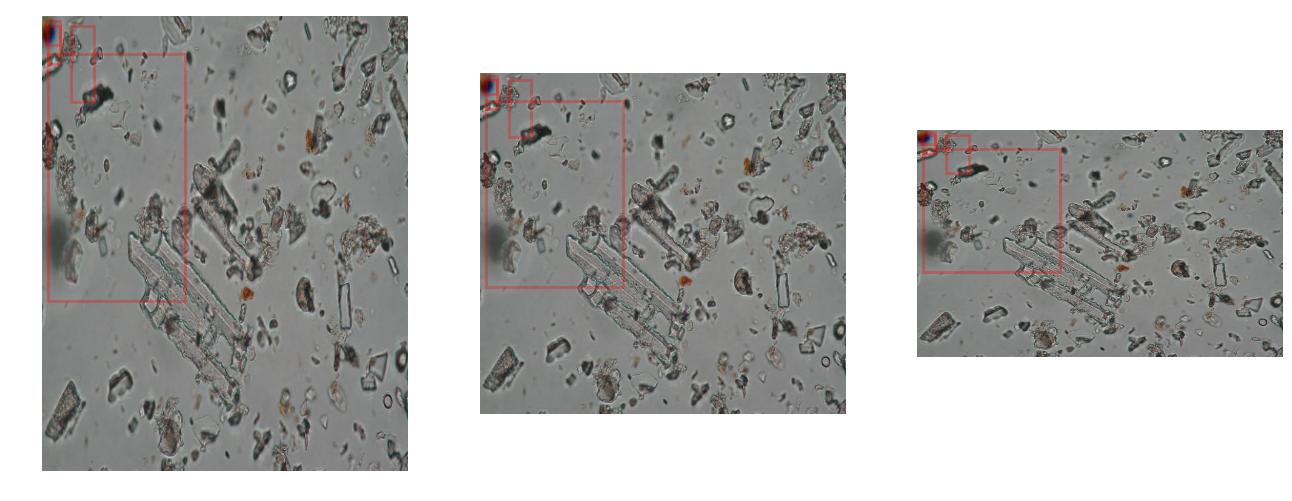

In [11]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(ncols=3, figsize=(16, 16), subplot_kw={'adjustable':'box-forced'})

i=0
for ax in axes:

    ax.imshow(r_h_imgs[i])
    ax.axis('off')
    for coord in rescale_h_c[i]:
        # x, y, width, height
        ax.add_patch(plt.Rectangle((coord[0], coord[1]), coord[2] - coord[0], coord[3] - coord[1], edgecolor='red',
                                   alpha=0.3, lw=2, facecolor='none'))
    i += 1

## 1.3. Rescalado en el eje vertical

In [12]:
r_v_imgs = []
r_v_imgs.append(rescale_one_image_axis(original_img, factors[0],1))
r_v_imgs.append(rescale_one_image_axis(original_img, factors[1],1))
r_v_imgs.append(rescale_one_image_axis(original_img, factors[2],1))

In [13]:
def rescale_v_coords(coords, factor):
    rescale_coords = []
    for coord in coords:
        r_coord = list(coord)
        r_coord[1] = r_coord[1] * factor
        r_coord[3] = r_coord[3] * factor
        rescale_coords.append(r_coord)
    return rescale_coords

In [14]:
rescale_v_c = []
rescale_v_c.append(rescale_v_coords(coords, factors[0]))
rescale_v_c.append(rescale_v_coords(coords, factors[1]))
rescale_v_c.append(rescale_v_coords(coords, factors[2]))

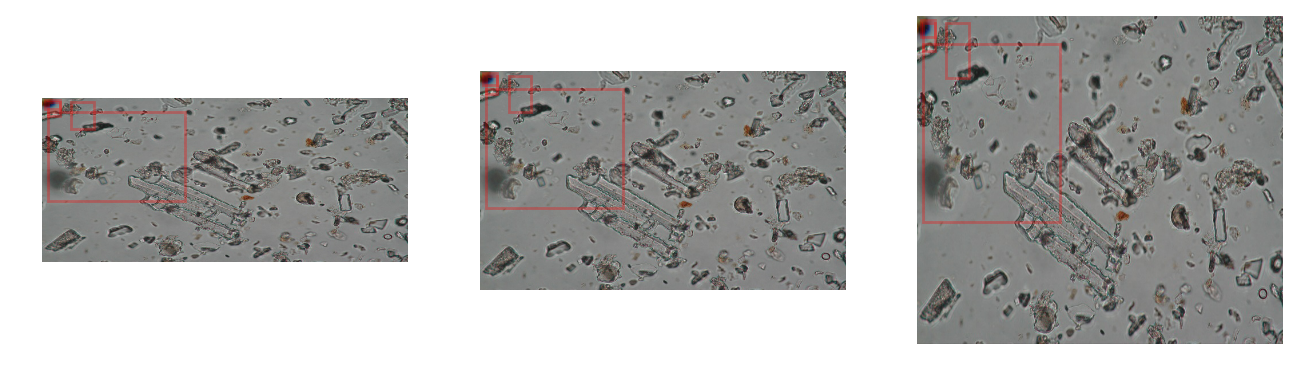

In [15]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(ncols=3, figsize=(16, 16), subplot_kw={'adjustable':'box-forced'})

i=0
for ax in axes:

    ax.imshow(r_v_imgs[i])
    ax.axis('off')
    for coord in rescale_v_c[i]:
        # x, y, width, height
        ax.add_patch(plt.Rectangle((coord[0], coord[1]), coord[2] - coord[0], coord[3] - coord[1], edgecolor='red',
                                   alpha=0.3, lw=2, facecolor='none'))
    i += 1

# 2. Espejar imágenes

En este caso, deberemos de espejar las coordenadas, como espejamos la imagen.

In [16]:
flipped_imgs = []

# Damos la vuelta a la imagen en el eje vertical
flipped_imgs.append(np.flipud(original_img))

# Damos la vuelta a la imagen en el eje horizontal
flipped_imgs.append(np.fliplr(original_img))

In [17]:
def flipud_coords(img_h, img_w, coords):
    flipped_coords = []
    for coord in coords:
        
        height = coord[3] - coord[1]
        
        y2 = img_h - coord[1]
        y = y2 - height
        
        flipped_coords.append([coord[0],y,coord[2],y2])
    return flipped_coords

In [18]:
def fliplr_coords(img_h, img_w, coords):
    flipped_coords = []
    for coord in coords:
        
        width = coord[2] - coord[0]
        
        x2 = img_w - coord[0]
        x = x2 - width
        
        flipped_coords.append([x,coord[1],x2,coord[3]])
    return flipped_coords

In [19]:
f_coords = [flipud_coords(original_img.shape[0], original_img.shape[1], coords)]
f_coords.append(fliplr_coords(original_img.shape[0], original_img.shape[1], coords))

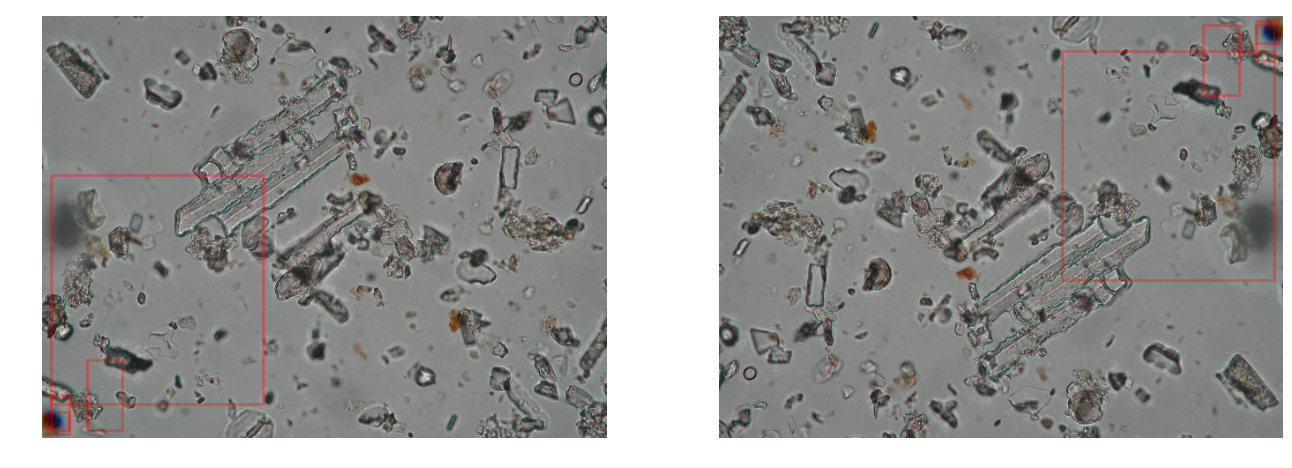

In [20]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(ncols=2, figsize=(16, 16), subplot_kw={'adjustable':'box-forced'})

i=0
for ax in axes:

    ax.imshow(flipped_imgs[i])
    ax.axis('off')

    for coord in f_coords[i]:
        # x, y, width, height
        ax.add_patch(plt.Rectangle((coord[0], coord[1]), coord[2] - coord[0], coord[3] - coord[1], edgecolor='red',
                                  alpha=0.3, lw=2, facecolor='none'))
    i += 1

# 3. Ruido en las imágenes

En este caso, las coordenadas no se ven modificadas.

In [21]:
from skimage.util import random_noise

In [22]:
noise_imgs = []

# Valores por defecto mode='gaussian'
# mean = 0, var = 0.01
# amount = 0.05, salt_vs_pepper = 0.5

noise_imgs.append(original_img)
noise_imgs.append(random_noise(original_img,mode="gaussian", mean=0, var=0.01))
noise_imgs.append(random_noise(original_img,mode="pepper", amount=0.1))
# Se puede utilizar el parametro local_vars a modo de matriz
# para indicar la varianza local en cada pixel, para el modo "localvar"
noise_imgs.append(random_noise(original_img,mode="localvar"))
#noise_imgs.append(random_noise(original_img,mode="poisson"))
noise_imgs.append(random_noise(original_img,mode="salt", amount=0.1))
noise_imgs.append(random_noise(original_img,mode="s&p", amount=0.05, salt_vs_pepper=0.5))
noise_imgs.append(random_noise(original_img,mode="speckle", mean=0, var=0.1))

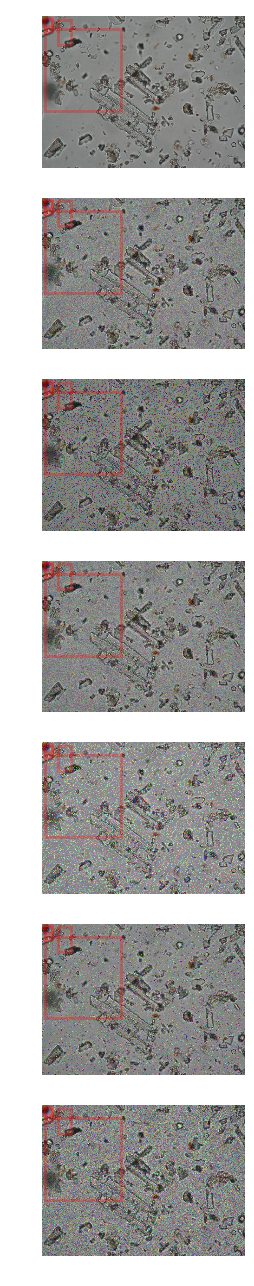

In [23]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(nrows= 7,
                         figsize=(16, 16), 
                         subplot_kw={'adjustable':'box-forced'})
axes = axes.ravel()
i=0
for ax in axes:

    ax.imshow(noise_imgs[i])
    ax.axis('off')

    for coord in coords:
        # x, y, width, height
        ax.add_patch(plt.Rectangle((coord[0], coord[1]), coord[2] - coord[0], coord[3] - coord[1], edgecolor='red',
                                  alpha=0.3, lw=2, facecolor='none'))
    i += 1

# 4. Rotaciones de 90, 180 y 270 grados

Rotamos las imágenes y , con ellas, las coordenadas.

In [24]:
rot_imgs = []

rot_imgs.append(rotate(original_img,90,resize=True))
rot_imgs.append(rotate(original_img,180,resize=True))
rot_imgs.append(rotate(original_img,270,resize=True))

Rotamos las coordenadas

In [25]:
def rotate_coords(img_h, img_w, angle, coords):
    '''Rotación de coordenadas solo implementado
    para ángulos de 90 en 90 grados'''
    rotated_coords = []
    coords = list(coords)
    #coord = x, y, x2, y2
    for coord in coords:
        if angle == 90:
            x = coord[1]
            y = img_w - coord[2]
            x2 = coord[3]
            y2 = y + coord[2] - coord[0]
        elif angle == 180:
            x = img_w - coord[2]
            y = img_h - coord[3]
            x2 = x + coord[2] - coord[0]
            y2 = y + coord[3] - coord[1]
        elif angle == 270:
            x = img_h - coord[3]
            y = coord[0]
            x2 = x + coord[3] - coord[1]
            y2 = y + coord[2] - coord[0]
        else:
            raise ValueError("Only implemented for 90, 180 and 270 degrees")
        rotated_coords.append([x,y,x2,y2])
    return rotated_coords

In [26]:
rot_coords = [rotate_coords(original_img.shape[0], original_img.shape[1], 90,coords)]
rot_coords.append(rotate_coords(original_img.shape[0], original_img.shape[1], 180,coords))
rot_coords.append(rotate_coords(original_img.shape[0], original_img.shape[1], 270,coords))

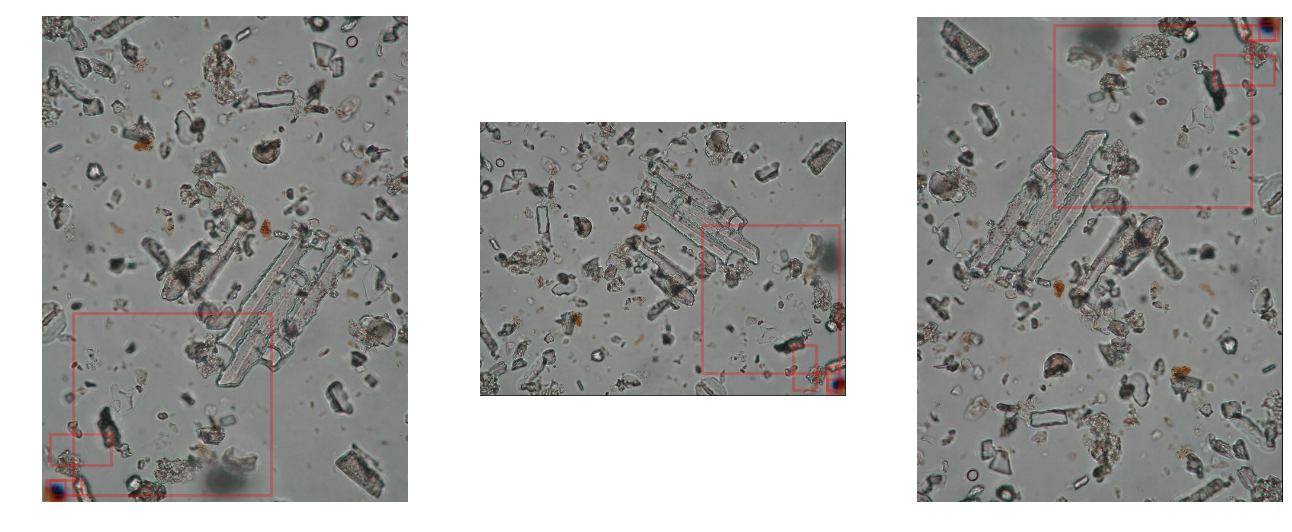

In [27]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(ncols=3, figsize=(16, 16), subplot_kw={'adjustable':'box-forced'})

i=0
for ax in axes:

    ax.imshow(rot_imgs[i])
    ax.axis('off')
    
    for coord in rot_coords[i]:
        #x, y, width, height
        ax.add_patch(plt.Rectangle((coord[0], coord[1]), coord[2] - coord[0], coord[3] - coord[1], edgecolor='red',
                                   alpha=0.3, lw=2, facecolor='none'))
    i += 1

# 5. Filtrar imagen

In [28]:
from skimage import exposure

fils_imgs = []

fils_imgs.append(original_img)
# 10 es un valor alto para el mínimo
p2, p98 = np.percentile(original_img, (5, 100))
fils_imgs.append(exposure.rescale_intensity(original_img, in_range=(p2, p98)))

# 90 es un valor bajo para el máximo
p2, p98 = np.percentile(original_img, (0, 90))
fils_imgs.append(exposure.rescale_intensity(original_img, in_range=(p2, p98)))

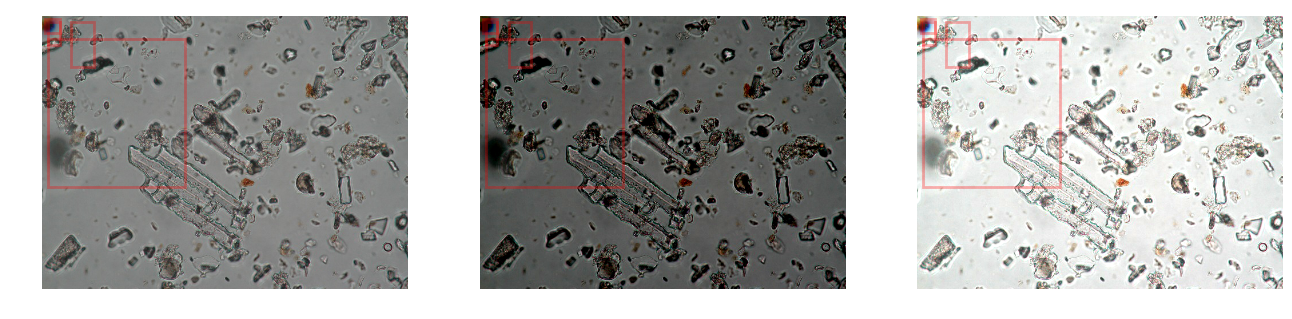

In [29]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(ncols=3, figsize=(16, 16), subplot_kw={'adjustable':'box-forced'})

i=0
for ax in axes:

    ax.imshow(fils_imgs[i])
    ax.axis('off')
    
    for coord in coords:
        #x, y, width, height
        ax.add_patch(plt.Rectangle((coord[0], coord[1]), coord[2] - coord[0], coord[3] - coord[1], edgecolor='red',
                                   alpha=0.3, lw=2, facecolor='none'))
    i += 1

# Generador de imágenes

In [30]:
# Contamos el número de imágenes que tenemos en
# el directorio de las imágenes etiquetadas
import os, os.path
import re

path="../../rsc/img/Default"
dest_path = "../../rsc/img/imgaum/"

pattern = re.compile("^.*\.jpg$", re.IGNORECASE)

def list_images(path='../rsc/img/Default'):
    images_list = []
    for name in os.listdir(path):
        json_name = name.split(".")[0] + ".json"
        if pattern.match(name) \
        and os.path.exists(path + "/" + json_name):
            images_list.append(path + "/" + name)
    return images_list

In [31]:
probs_technic = 0.50
probs_especific_technic = 0.76
probs_subespecific_technic = [0.76, 0.84, 0.92] 

In [32]:
def random_resize(image, coords_dict):
    # Cambio de tamaño de imagen
    
    image = np.array(image)
    
    # 1. Ambos ejes
    rands_for_resize = [random.random() for j in range(3)]
    
    if rands_for_resize[0] > probs_especific_technic:
        rand = round(random.uniform(0.6, 1.2),1)
        
        image = rescale(image, rand)
        for k, coords in coords_dict.items():
            coords_dict[k] = rescale_coords(coords, rand)
        
    # 2. Eje horizontal
    if rands_for_resize[1] > probs_especific_technic:
        rand = round(random.uniform(0.6, 1.2),1)
        
        image = rescale_one_image_axis(image, rand)
        
        for k, coords in coords_dict.items():
            coords_dict[k] = rescale_h_coords(coords, rand)
    
    # 3. Eje vertical
    if rands_for_resize[2] > probs_especific_technic:
        rand = round(random.uniform(0.6, 1.2),1)

        image = rescale_one_image_axis(image, rand, 1)

        for k, coords in coords_dict.items():
            coords_dict[k] = rescale_v_coords(coords, rand)
    return image, coords_dict

In [33]:
def random_flip(image, coords_dict):
    
    image = np.array(image)
    
    rands_for_flip = [random.random() for j in range(2)]
    if rands_for_flip[0] > probs_especific_technic:
        image = np.flipud(image)
        
        for k, coord in coords_dict.items():
            coords_dict[k] = flipud_coords(image.shape[0], image.shape[1], coord)
    if rands_for_flip[1] > probs_especific_technic:
        image = np.fliplr(image)
        
        for k, coord in coords_dict.items():
            coords_dict[k] = fliplr_coords(image.shape[0], image.shape[1], coord)
    return image, coords_dict

In [34]:
def my_random_noise(image):
    rands_for_noise = [random.random() for j in range(6)]
    if rands_for_noise[0] > probs_especific_technic:
        image = random_noise(image,mode="gaussian", mean=0, var=0.01)
    if rands_for_noise[1] > probs_especific_technic:
        image = random_noise(image,mode="pepper", amount=0.1)
    if rands_for_noise[2] > probs_especific_technic:
        image = random_noise(image,mode="localvar")
    if rands_for_noise[3] > probs_especific_technic:
        image = random_noise(image,mode="salt", amount=0.1)
    if rands_for_noise[4] > probs_especific_technic:
        image = random_noise(image,mode="s&p", amount=0.05, salt_vs_pepper=0.5)
    if rands_for_noise[5] > probs_especific_technic:
        image = random_noise(image,mode="speckle", mean=0, var=0.1)
    return image

In [35]:
def my_filter(image):
    rands_for_filter = random.random()
    if rands_for_filter > 0.5:
        # 10 es un valor alto para el mínimo
        p2, p98 = np.percentile(image, (2, 100))
        image = exposure.rescale_intensity(image, in_range=(p2, p98))
    else:
        # 90 es un valor bajo para el máximo
        p2, p98 = np.percentile(image, (0, 90))
        image = exposure.rescale_intensity(image, in_range=(p2, p98))
    return image

In [36]:
def random_rotate(image, coords_dict):
    
    mod_image = np.array(image)
    mod_coords_dict = dict()
    
    rands_for_rotation = [random.random() for j in range(2)]
    
    if rands_for_rotation[0] > probs_especific_technic:
        mod_image = rotate(mod_image, 90,resize=True)
        
        for k, coords in coords_dict.items():
            
            mod_coords_dict[k] = rotate_coords(image.shape[0],
                                           image.shape[1], 90, coords)
            
    elif rands_for_rotation[1] > probs_especific_technic:
        mod_image = rotate(mod_image, 180,resize=True)
        
        for k, coords in coords_dict.items():
            
            mod_coords_dict[k] = rotate_coords(image.shape[0],
                                           image.shape[1], 180, coords)
        
    else:
        mod_image = rotate(mod_image, 270,resize=True)
        
        for k, coords in coords_dict.items():
            
            mod_coords_dict[k] = rotate_coords(image.shape[0],
                                           image.shape[1], 270, coords)
        
    return mod_image, mod_coords_dict

Función para la adaptación de las coordenadas del etiquetador a como se tratán aqui las coordenadas

In [37]:
def read_coords_conversion(coords_dict):
    for k, coords in coords_dict.items():
        coords_mod = np.array(coords)
        coords_mod = coords_mod[:,[2,0,3,1]]
        coords_mod = coords_mod.tolist()
        coords_dict[k] = coords_mod
    return coords_dict

In [38]:
def save_coords_conversion(coords_dict):
    for k, coords in coords_dict.items():
        coords_mod = np.array(coords)
        coords_mod = coords_mod[:,[1,3,0,2]]
        coords_mod = coords_mod.tolist()
        coords_dict[k] = coords_mod
    return coords_dict

In [39]:
import copy

images_names_list = list_images(path)
initial_value = len(images_names_list)
end_value = initial_value * 100

def data_augmentation_generator(number_of_images, initial_value, end_value, images_names_list, dest_path):
    
    # Calculamos el número de imágenes que hay
    # que generar por cada imagen hasta llegar
    # al número especificado por el usuario
    if initial_value == 0:
        raise ValueError("Number of images must be greater than 0")
    
    images_per_image = ceil(number_of_images / initial_value)
    
    counter = 0
    # Generamos imágenes con filtros aleatorios
    # hasta llegar a completar el número deseado
    for name in images_names_list:
        
        original_image = io.imread(name)
        
        json_path = "../../" + name.split(".")[-2] + ".json"
        image_name = os.path.split(name)[1].split(".")[0]
        image_with_format = image_name + ".jpg"
        
        # Cargamos coordenadas, si existen,
        # y si no existe fichero de coordenadas
        # pasamos a la siguiente imagen
        if os.path.exists(json_path):
            with open(json_path) as jsonfile:
                coords_dict = json.load(jsonfile)
                coords_dict = coords_dict[image_with_format]
                coords_dict = read_coords_conversion(coords_dict)
        else:
            continue

        for i in range(images_per_image):
            
            # Paramos si hemos llegado al número
            # de imágenes que deseamos
            if counter == end_value:
                    break
            
            mod_image = original_image
            
            mod_coords = dict(coords_dict)
            # Generamos números aleatorios a partir
            # de los cuales aplicamos un filtro 
            # o no a una imágen
            rands = [random.random() for j in range(5)]
            
            # Cambios de tamaño en la imagen
            if rands[0] > probs_technic:
                mod_image, mod_coords = random_resize(mod_image, mod_coords)
            
            # Espejados de imagen
            # 1. Espejado vertical
            # 2.  Espejado horizontal
            if rands[1] > probs_technic:
                mod_image, mod_coords = random_flip(mod_image, mod_coords)
            
            # Ruido en las imágenes
            # 7 tipos de ruido
            if rands[2] > probs_technic:
                # En este caso las coordenadas son las mismas
                mod_image = my_random_noise(mod_image)
                
            # Rotaciones
            # En 90, 180 o 270 grados
            if rands[3] > probs_technic:
                mod_image, mod_coords = random_rotate(mod_image, mod_coords)
                
            # Filtrado de las imágenes
            if rands[4] > probs_technic:
                mod_image = my_filter(mod_image)
            
            # Guardamos imagen
            io.imsave(dest_path + image_name + str(counter) + ".jpg",
                                       mod_image, quality=100)
            
            with open(dest_path + image_name + str(counter) + ".json", "w") as jsonfile2:
                mod_coords_dict = dict()
                mod_coords_dict[image_name + str(counter) + ".jpg"] = save_coords_conversion(mod_coords)
                json.dump(mod_coords_dict, jsonfile2)
                
            counter += 1
            
interact_manual(data_augmentation_generator, 
                number_of_images=(initial_value,end_value,10),
                initial_value=fixed(initial_value),
                end_value=fixed(end_value),
                images_names_list=fixed(images_names_list),
                dest_path=fixed(dest_path))

<function __main__.data_augmentation_generator>